# Import libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Exploratory Data Analysis

In [44]:
df = pd.read_csv("C:\\Users\\Md Touseef\\Downloads\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [48]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [49]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [50]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [51]:
df.duplicated().any()

False

In [52]:
df.shape

(200, 4)

In [53]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

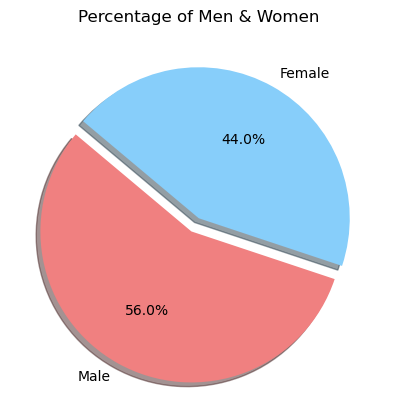

In [54]:
labels = ['Male','Female']
size  =list(df["Gender"].value_counts())
color = ['lightcoral', 'lightskyblue']
explode = (0.1,0)

plt.pie(size, explode=explode, labels=labels, colors=color,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Percentage of Men & Women")

plt.show()

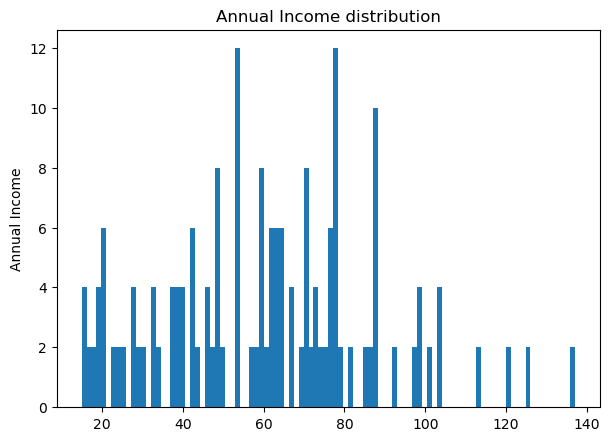

In [55]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = df['Annual Income (k$)']
plt.hist(x, bins=100)
plt.gca().set(title='Annual Income distribution', ylabel='Annual Income');

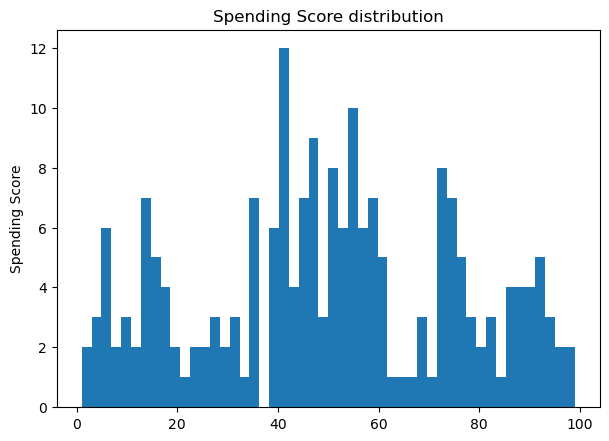

In [56]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = df['Spending Score (1-100)']
plt.hist(x, bins=50)
plt.gca().set(title='Spending Score distribution', ylabel='Spending Score');

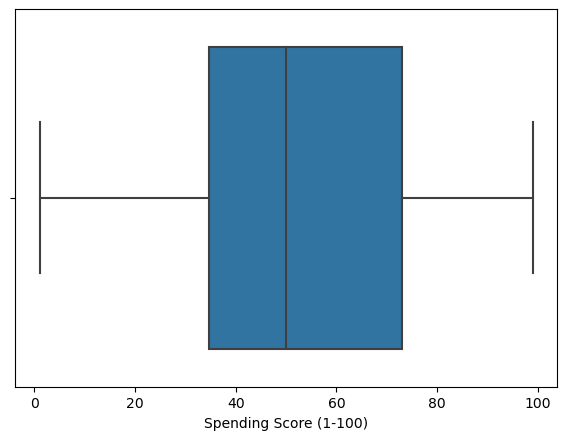

In [57]:
sns.boxplot(x=df['Spending Score (1-100)'])
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

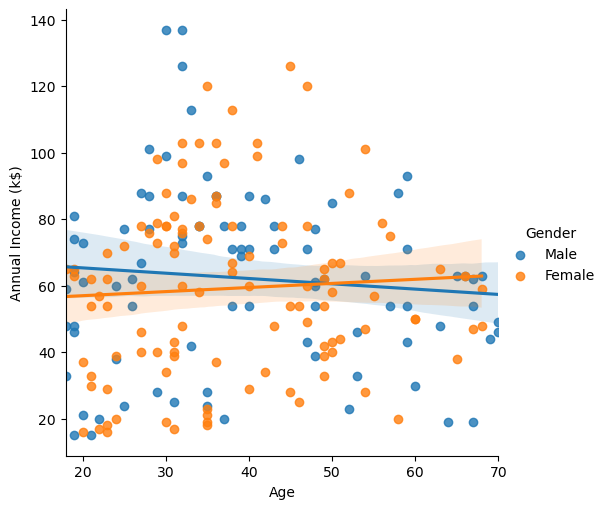

In [58]:
sns.lmplot(x='Age',y='Annual Income (k$)',data=df,hue="Gender")
plt.savefig('reglm.png', dpi=300, bbox_inches='tight')
plt.show()

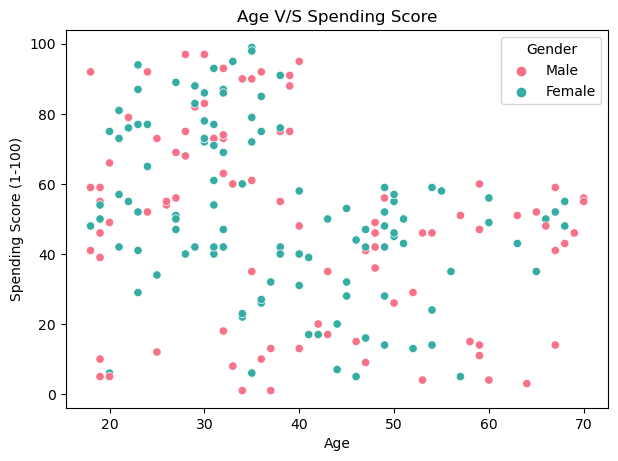

In [59]:
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df, palette="husl", hue = "Gender")
plt.title('Age V/S Spending Score')
plt.savefig('agescplot.png', dpi=300, bbox_inches='tight')
plt.show()

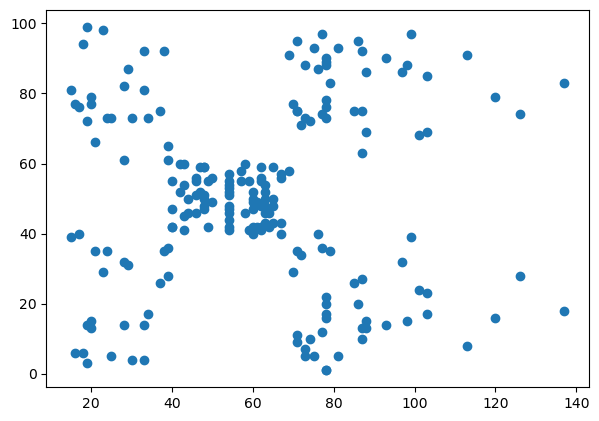

In [60]:
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

plt.scatter(x,y)
plt.show()

# Clustering for 2 features

In [61]:
# selecting annual income and spending score 
f=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
f

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Elbow method

In [62]:
sse=[]
l=range(1,21)
for k in l:
    kmeans_model_twof=KMeans(n_clusters=k,random_state=0)
    kmeans_model_twof.fit(f)
    sse.append(kmeans_model_twof.inertia_)

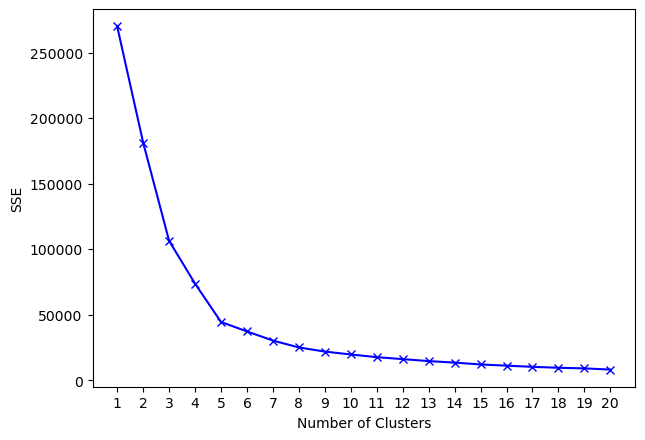

In [63]:
plt.plot(l, sse,'bx-')
plt.xticks(l)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig('elbowtwof.png', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
kl = KneeLocator(l, sse,curve="convex", direction="decreasing")
print('The optimal k value for two features is {}'.format(kl.knee))

The optimal k value for two features is 5


# Silhouette Coefficient Method

In [65]:
SC=[]
r= range(2,21)
for k in r:
    s_kmeans_model_twof=KMeans(n_clusters=k)
    s_kmeans_model_twof.fit(f)
    SC.append(silhouette_score(f,s_kmeans_model_twof.labels_))

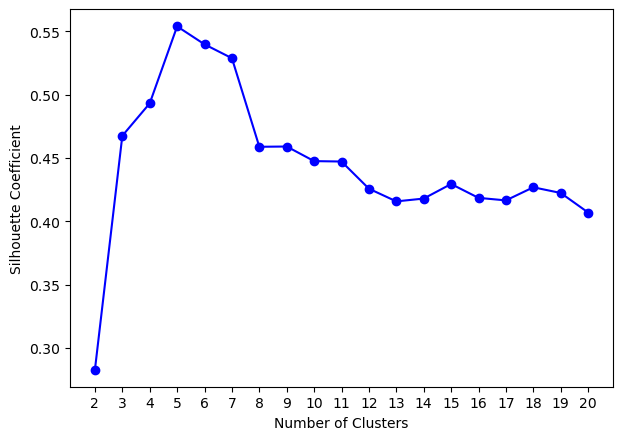

In [66]:
plt.plot(r,SC,'bo-')
plt.xticks(r)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.savefig('sichplot.png', dpi=300, bbox_inches='tight')
plt.show()

# k means algorithm

In [67]:
update_kmeans_model_twof=(KMeans(n_clusters=5,init='k-means++', 
                      max_iter=600, 
                      random_state=23,algorithm='elkan'))
update_kmeans_model_twof.fit(f)
labels_twof=update_kmeans_model_twof.labels_
centroids_twof=update_kmeans_model_twof.cluster_centers_
y_kmeans=update_kmeans_model_twof.fit_predict(f)
print("Within the clusters the interia(sum of the squares) of the model is:",update_kmeans_model_twof.inertia_)

Within the clusters the interia(sum of the squares) of the model is: 44448.45544793369


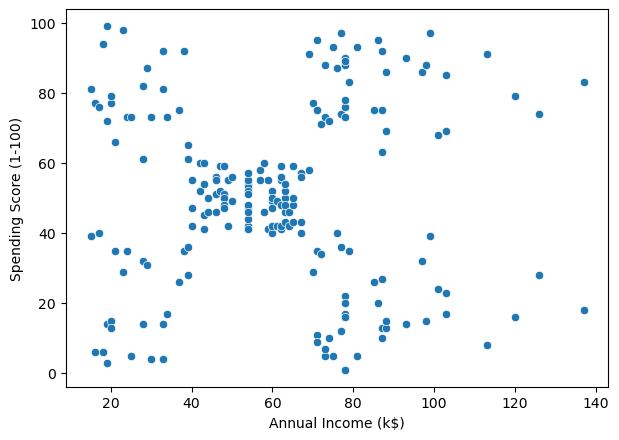

In [68]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, palette="husl")
plt.savefig('annualpairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# k means plotting

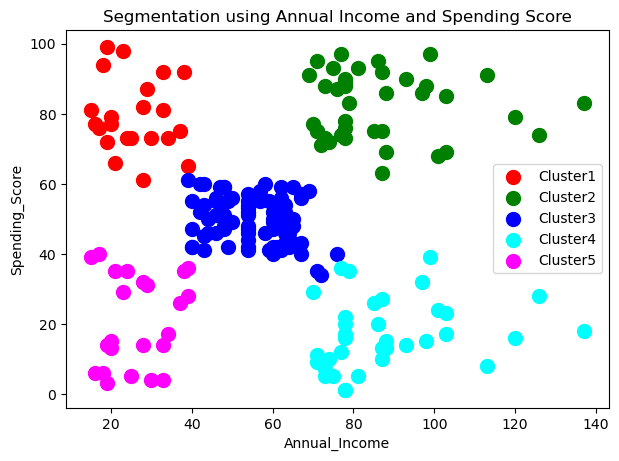

In [69]:
plt.scatter(f[y_kmeans ==0,0], f[y_kmeans == 0,1], s=100, c='red',label = 'Cluster1')
plt.scatter(f[y_kmeans ==1,0], f[y_kmeans == 1,1], s=100, c='green',label ='Cluster2')
plt.scatter(f[y_kmeans ==2,0], f[y_kmeans == 2,1], s=100, c='blue',label = 'Cluster3')
plt.scatter(f[y_kmeans ==3,0], f[y_kmeans == 3,1], s=100, c='cyan',label = 'Cluster4')
plt.scatter(f[y_kmeans ==4,0], f[y_kmeans == 4,1], s=100, c='magenta',label = 'Cluster5')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.title('Segmentation using Annual Income and Spending Score')
plt.legend()
plt.savefig('kmeansplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Clustering for 3 features

In [70]:
# selecting  necessary features for clustring which are useful and insightful  
x=df.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


# Elbow method

In [71]:
SSE=[]
for k in l:
    kmeans_model=KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(x)
    SSE.append(kmeans_model.inertia_)

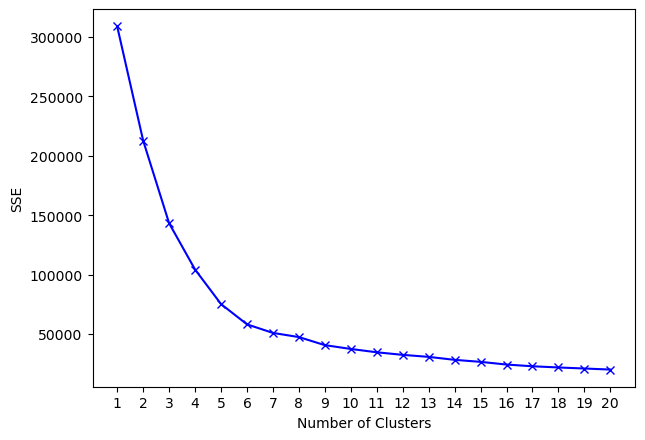

In [72]:
plt.plot(l, SSE,'bx-')
plt.xticks(l)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig('elbowtwof.png', dpi=300, bbox_inches='tight')
plt.show()

In [73]:
kl = KneeLocator(l, SSE,curve="convex", direction="decreasing")
print('The optimal k value for three features is {}'.format(kl.knee))

The optimal k value for three features is 6


# Silhouette Coefficient Method

In [74]:
sc=[]
r=range(2,21)
for k in r:
    s_kmeans_model=KMeans(n_clusters=k)
    s_kmeans_model.fit(x)
    sc.append(silhouette_score(x,s_kmeans_model.labels_))

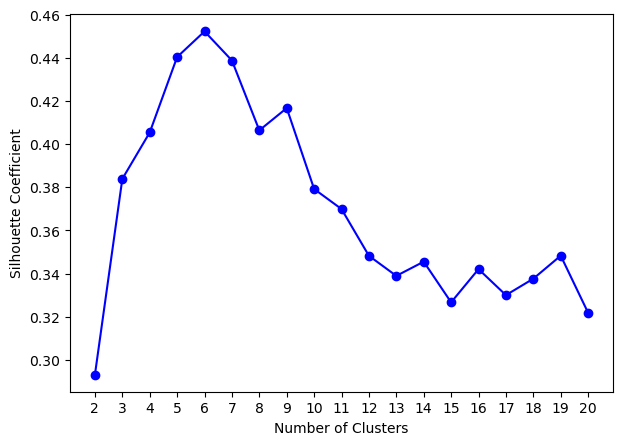

In [75]:
plt.plot(r,sc,'bo-')
plt.xticks(r)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.savefig('sichplotthreef.png', dpi=300, bbox_inches='tight')
plt.show()

# k means algorithm

In [76]:
update_kmeans_model = KMeans(n_clusters=6,init='k-means++', 
                      max_iter=600, 
                      random_state=23)
update_kmeans_model.fit(x)
labels=update_kmeans_model.labels_
centroids=update_kmeans_model.cluster_centers_
print("Within the clusters the interia(sum of the squares) of the model is:",update_kmeans_model.inertia_)

Within the clusters the interia(sum of the squares) of the model is: 58300.443321590676


# k means plotting

In [77]:
trace=go.Scatter3d(
x=x['Spending Score (1-100)'],
y=x['Annual Income (k$)'],
z=x['Age'],
mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace, layout=layout)
py.offline.iplot(fig)